In [1]:
import pandas as pd
#데이터 로딩
df = pd.read_csv('c:/data/titanic/train3.csv')
df.head()

,Survived,Pclass1,Pclass2,Pclass3,male,female,Age,SibSp,Parch,Fare
0,0,0,0,1,1,0,22.0,1,0,7.2500
1,1,1,0,0,0,1,38.0,1,0,71.2833
2,1,0,0,1,0,1,26.0,0,0,7.9250
3,1,1,0,0,0,1,35.0,1,0,53.1000
4,0,0,0,1,1,0,35.0,0,0,8.0500


In [2]:
train_cols=df.columns[1:]
X = df[train_cols] # 독립변수
y = df["Survived"] # 종속변수

In [3]:
from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=train_cols )
y_samp = pd.DataFrame(data=y_sample,columns=['Survived'])
df_samp=pd.concat([X_samp,y_samp],axis=1)

In [4]:
X = X_samp[train_cols] # 독립변수
y = y_samp["Survived"]

In [5]:
from sklearn.model_selection import train_test_split
#데이터셋 구분
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size=0.2, random_state=7)


In [6]:
from keras.models import Sequential
from keras.layers import Dense
# 3. 모델 구성
model = Sequential()
# 노드개수, 독립변수개수, 활성화함수 relu
model.add(Dense(128, input_shape=(len(X_train.columns),), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
# sigmoid : 0.0~1.0
model.add(Dense(1, activation='sigmoid'))
# 4. 모델 학습과정 설정/ 손실함수: mse(평균제곱오차)
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1280      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 13,761
Trainable params: 13,761
Non-trainable params: 0
_________________________________________________________________


['c:/data/titanic/scaler.model']

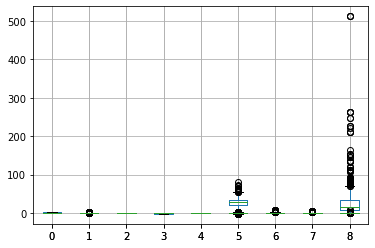

In [8]:
X_train.boxplot()
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler() #평균 0, 표준편차 1
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)
# 넘파이 배열로 바뀜
# 넘파이 배열 => 데이터프레임
X_train_scaled=pd.DataFrame(X_train_scaled)
X_test_scaled=pd.DataFrame(X_test_scaled)
X_train_scaled.boxplot()
# 스케일러 백업
from joblib import dump
dump(scaler, 'c:/data/titanic/scaler.model', compress=True)


In [9]:
#모델 학습
hist = model.fit(X_train_scaled, y_train, epochs=500)

Epoch 1/500
18/18 [==============================] - 1s 5ms/step - loss: 0.2226 - accuracy: 0.6874
Epoch 2/500
18/18 [==============================] - 0s 5ms/step - loss: 0.1559 - accuracy: 0.7879
Epoch 3/500
18/18 [==============================] - 0s 4ms/step - loss: 0.1420 - accuracy: 0.7934
Epoch 4/500
18/18 [==============================] - 0s 4ms/step - loss: 0.1381 - accuracy: 0.7971
Epoch 5/500
18/18 [==============================] - 0s 5ms/step - loss: 0.1358 - accuracy: 0.8080
Epoch 6/500
18/18 [==============================] - 0s 5ms/step - loss: 0.1331 - accuracy: 0.8135
Epoch 7/500
18/18 [==============================] - 0s 4ms/step - loss: 0.1324 - accuracy: 0.8154
Epoch 8/500
18/18 [==============================] - 0s 4ms/step - loss: 0.1309 - accuracy: 0.8263
Epoch 9/500
18/18 [==============================] - 0s 4ms/step - loss: 0.1333 - accuracy: 0.8135
Epoch 10/500
18/18 [==============================] - 0s 4ms/step - loss: 0.1324 - accuracy: 0.8099
Epoch 11/

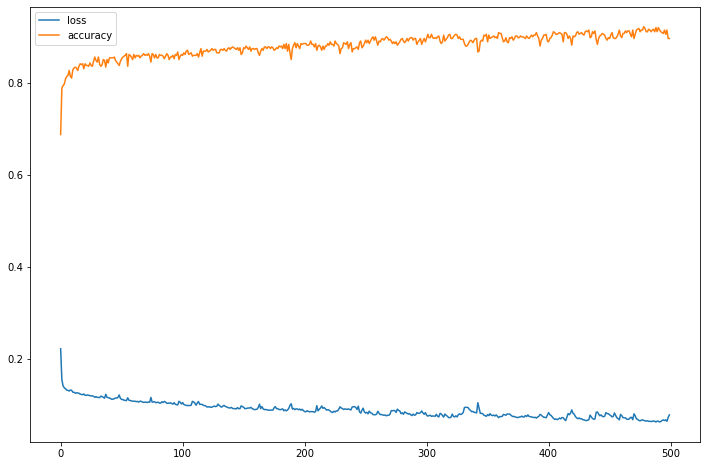

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['accuracy'])
plt.legend(['loss','accuracy'])
plt.show()

In [11]:
# 7. 모델 평가 - 학습용
scores = model.evaluate(X_train_scaled, y_train, verbose=1)
print(scores)
# - 검증용
scores = model.evaluate(X_test_scaled, y_test, verbose=1)
print(scores)

18/18 [==============================] - 0s 4ms/step - loss: 0.0719 - accuracy: 0.9049
[0.07193917781114578, 0.9049360156059265]
5/5 [==============================] - 0s 4ms/step - loss: 0.1841 - accuracy: 0.7810
[0.18405161798000336, 0.7810218930244446]


In [12]:
# 1등석, 2등석, 3등석, 남성여부, 여성여부, 나이, 형제자매, 부모자녀, 요금
# 3등석, 남성, 19세, 형제자매2, 부모자녀0, 요금 50
person1 = [[0, 0, 1, 1, 0, 19, 2, 0, 50]]
# 1등석, 여성, 17세, 형제자매 0, 부모자녀 2, 요금 30
person2 = [[1, 0, 0, 0, 1, 17, 0, 2, 30]]
# 2등석, 여성, 40세, 형제자매 1, 부모자녀 1, 요금 70
person3 = [[0, 1, 0, 0, 1, 40, 1, 1, 70]]


In [13]:
person1

[[0, 0, 1, 1, 0, 19, 2, 0, 50]]

In [14]:
# 입력데이터를 스케일링 한 후 테스트
person1=scaler.transform(person1)
person2=scaler.transform(person2)
person3=scaler.transform(person3)
print(model.predict(person1))
print(model.predict(person2))
print(model.predict(person3))

1/1 [==============================] - 0s 107ms/step


c:\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


[[0.00542858]]
1/1 [==============================] - 0s 106ms/step
[[1.]]
1/1 [==============================] - 0s 36ms/step
[[1.]]


In [15]:
person1

array([[-0.61468183, -0.51310764,  0.96584791,  0.84541915, -0.84541915,
        -0.78891727,  1.50677376, -0.49451169,  0.25319282]])

In [16]:
# 모형을 지정한 디렉토리에 저장
model.save('c:/data/titanic')

INFO:tensorflow:Assets written to: c:/data/titanic\assets
